# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
#f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}"

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


In [4]:
cities

['papatowai',
 'fort bragg',
 'tolanaro',
 'sitka',
 'yellowknife',
 'nadi',
 'port elizabeth',
 'port-aux-francais',
 'suomussalmi',
 'adamstown',
 'sibi',
 'bredasdorp',
 'taiohae',
 'kyzyl-kyya',
 'gereida',
 'grytviken',
 'hawaiian paradise park',
 'waitangi',
 'esens',
 'orapa',
 'edinburgh of the seven seas',
 'rawson',
 'bhim tal',
 'mao',
 'queenstown',
 'uturoa',
 'afaahiti',
 'huarmey',
 'north bend',
 'tacna',
 'ta`u',
 'east london',
 'lihue',
 'albertina',
 'bethel',
 'tofol',
 'anadyr',
 'kalix',
 'invercargill',
 'yasnyy',
 'balod',
 'ixtapa',
 'constantia',
 'wailua homesteads',
 'avarua',
 'minas de marcona',
 'huilong',
 'camp verde',
 'puerto ayora',
 "st. john's",
 'atafu village',
 "'ohonua",
 'ust-nera',
 'mehran',
 'tazovsky',
 'thompson',
 'tiksi',
 'tranovaho',
 'petropavlovsk-kamchatsky',
 'aykhal',
 'saipan',
 'hithadhoo',
 'yuzhno-kurilsk',
 'brisas de zicatela',
 "vel'sk",
 'laurel',
 'isafjordur',
 'hermanus',
 'zag',
 'saldanha',
 'yarmouth',
 'moree',
 '

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+f"q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng =city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']/10
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        print(city_lat,city_lng,city_date)
        
        #JUST WANT TO SMALL AMOUNT OF DATA FOR THE TEST
        
            
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(0.2)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
-46.5619 169.4708 1720326580
Processing Record 2 of Set 1 | fort bragg
35.139 -79.006 1720326582
Processing Record 3 of Set 1 | tolanaro
-25.0319 46.9987 1720326584
Processing Record 4 of Set 1 | sitka
57.0531 -135.33 1720326586
Processing Record 5 of Set 1 | yellowknife
62.456 -114.3525 1720326587
Processing Record 6 of Set 1 | nadi
-17.8 177.4167 1720326561
Processing Record 7 of Set 1 | port elizabeth
-33.918 25.5701 1720326590
Processing Record 8 of Set 1 | port-aux-francais
-49.35 70.2167 1720326592
Processing Record 9 of Set 1 | suomussalmi
64.8869 28.9078 1720326593
Processing Record 10 of Set 1 | adamstown
-25.066 -130.1015 1720326595
Processing Record 11 of Set 1 | sibi
29.5448 67.8764 1720326596
Processing Record 12 of Set 1 | bredasdorp
-34.5322 20.0403 1720326597
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | kyzyl-kyya
40

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)



# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,28.234,83,88,8.50,NZ,1720326580
1,fort bragg,35.1390,-79.0060,29.937,92,20,3.60,US,1720326582
2,tolanaro,-25.0319,46.9987,29.319,83,40,4.12,MG,1720326584
3,sitka,57.0531,-135.3300,28.709,77,40,6.17,US,1720326586
4,yellowknife,62.4560,-114.3525,29.144,52,40,2.57,CA,1720326587


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,papatowai,-46.5619,169.4708,28.234,83,88,8.50,NZ,1720326580
1,1,fort bragg,35.1390,-79.0060,29.937,92,20,3.60,US,1720326582
2,2,tolanaro,-25.0319,46.9987,29.319,83,40,4.12,MG,1720326584
3,3,sitka,57.0531,-135.3300,28.709,77,40,6.17,US,1720326586
4,4,yellowknife,62.4560,-114.3525,29.144,52,40,2.57,CA,1720326587


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

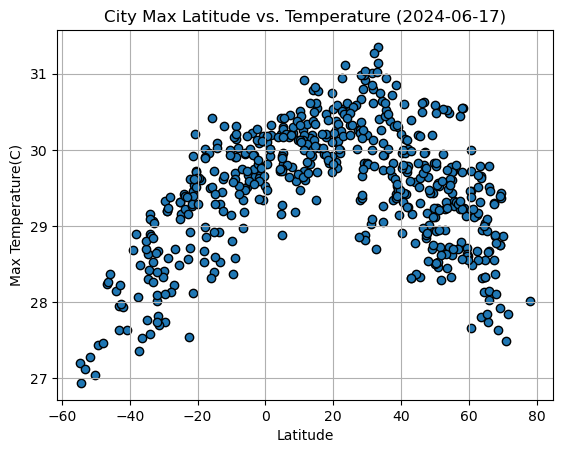

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df['Lat'],y=city_data_df['Max Temp'],edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2024-06-17)')

plt.ylabel('Max Temperature(C)')
plt.xlabel('Latitude')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

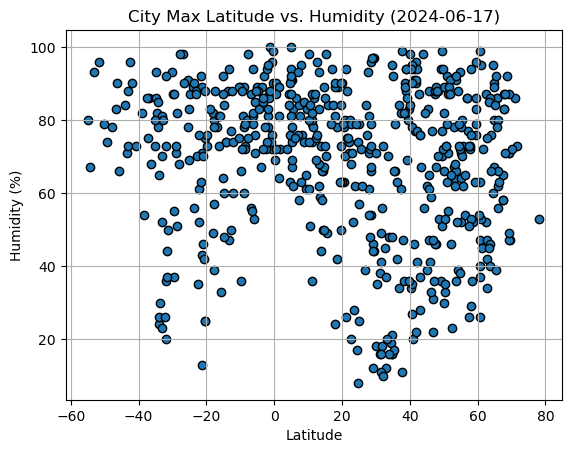

In [12]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

plt.scatter(x=city_data_df['Lat'],y=city_data_df['Humidity'],edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2024-06-17)')

plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

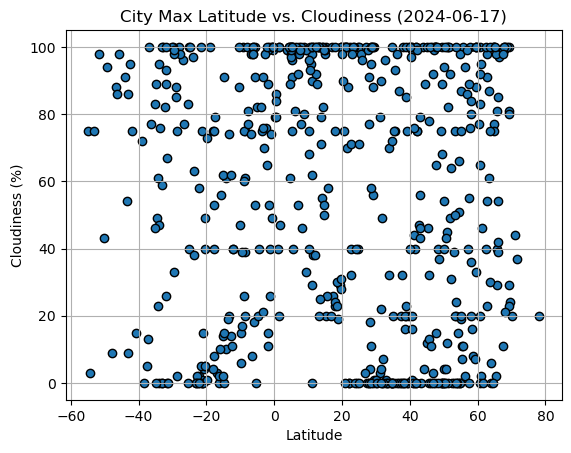

In [13]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

plt.scatter(x=city_data_df['Lat'],y=city_data_df['Cloudiness'],edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2024-06-17)')

plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

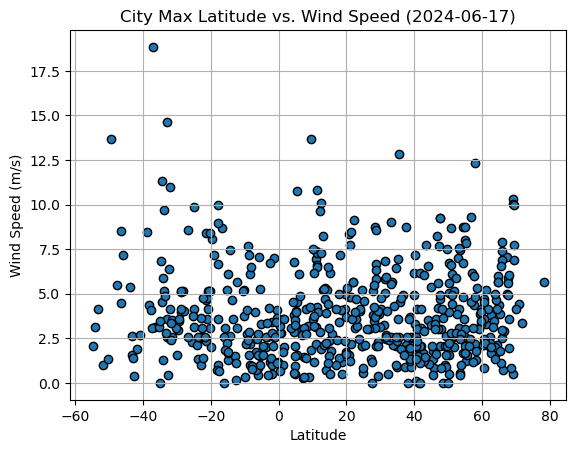

In [14]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x=city_data_df['Lat'],y=city_data_df['Wind Speed'],edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2024-06-17)')

plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
def create_linear_regression_plot(x, y):
    # Fit a linear regression model
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)

    # Create scatter plot
    plt.scatter(x, y, label='Data Points')

    # Create the regression line
    plt.plot(x, polynomial(x), color='r', label='Linear Regression Line')

    # Set plot labels and title
    plt.xlabel('X-axis Label')
    plt.ylabel('Y-axis Label')
    plt.title('Linear Regression Plot')

    # Show the plot
    plt.legend()
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,fort bragg,35.1390,-79.0060,29.937,92,20,3.60,US,1720326582
3,3,sitka,57.0531,-135.3300,28.709,77,40,6.17,US,1720326586
4,4,yellowknife,62.4560,-114.3525,29.144,52,40,2.57,CA,1720326587
8,8,suomussalmi,64.8869,28.9078,28.552,80,77,4.39,FI,1720326593
10,10,sibi,29.5448,67.8764,30.918,44,1,3.89,PK,1720326596


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,papatowai,-46.5619,169.4708,28.234,83,88,8.50,NZ,1720326580
2,2,tolanaro,-25.0319,46.9987,29.319,83,40,4.12,MG,1720326584
5,5,nadi,-17.8000,177.4167,30.015,57,40,6.69,FJ,1720326561
6,6,port elizabeth,-33.9180,25.5701,29.154,24,0,5.14,ZA,1720326590
7,7,port-aux-francais,-49.3500,70.2167,27.435,74,94,13.68,TF,1720326592


###  Temperature vs. Latitude Linear Regression Plot

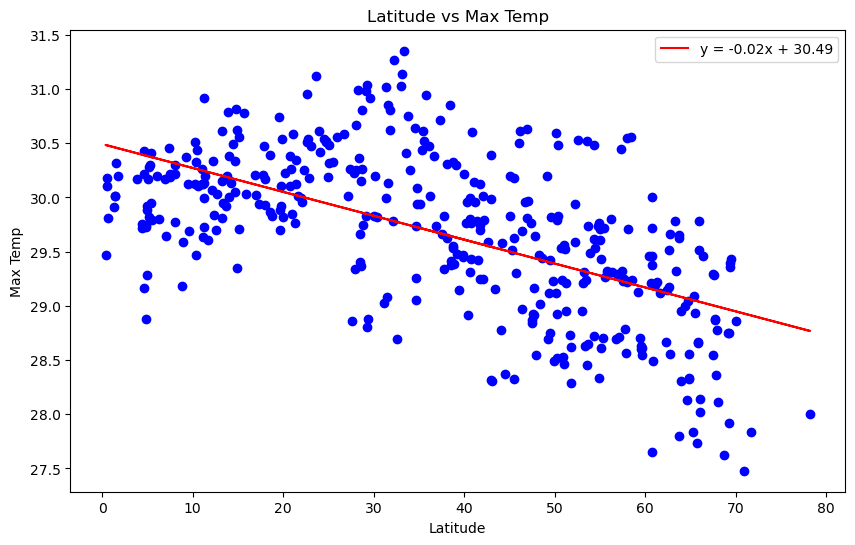

In [40]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

def create_linear_regression_plot(x, y, title, xlabel, ylabel):
    # Perform linear regression
    m, b = np.polyfit(x, y, 1)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue')
    plt.plot(x, m*x + b, color='red', label=f'y = {m:.2f}x + {b:.2f}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Example usage
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
title = "Latitude vs Max Temp"
xlabel = 'Latitude'
ylabel = 'Max Temp'
create_linear_regression_plot(x, y, title, xlabel, ylabel)


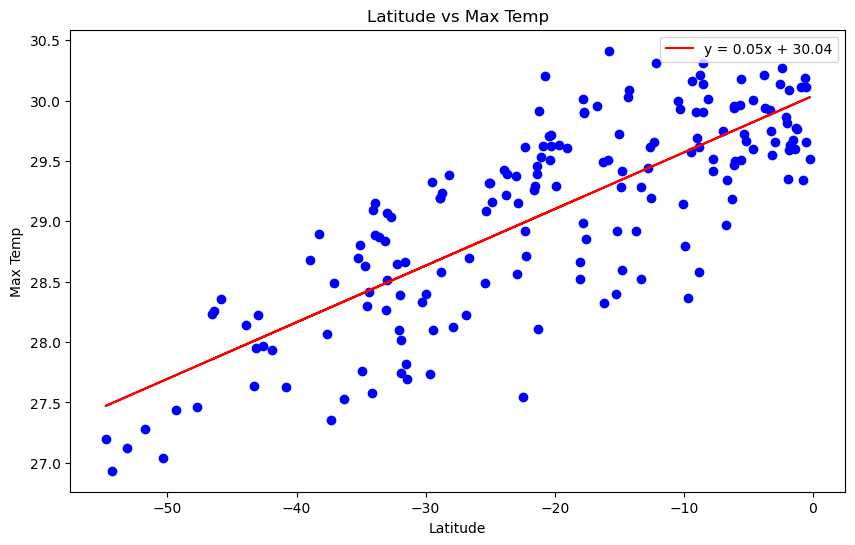

In [42]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

def create_linear_regression_plot(x, y, title, xlabel, ylabel):
    # Perform linear regression
    m, b = np.polyfit(x, y, 1)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue')
    plt.plot(x, m*x + b, color='red', label=f'y = {m:.2f}x + {b:.2f}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

x=southern_hemi_df['Lat']
y=southern_hemi_df['Max Temp']
title = "Latitude vs Max Temp"
ylabel = 'Max Temp'
xlabel = 'Latitude'
create_linear_regression_plot(x, y, title, xlabel, ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE 

### Humidity vs. Latitude Linear Regression Plot

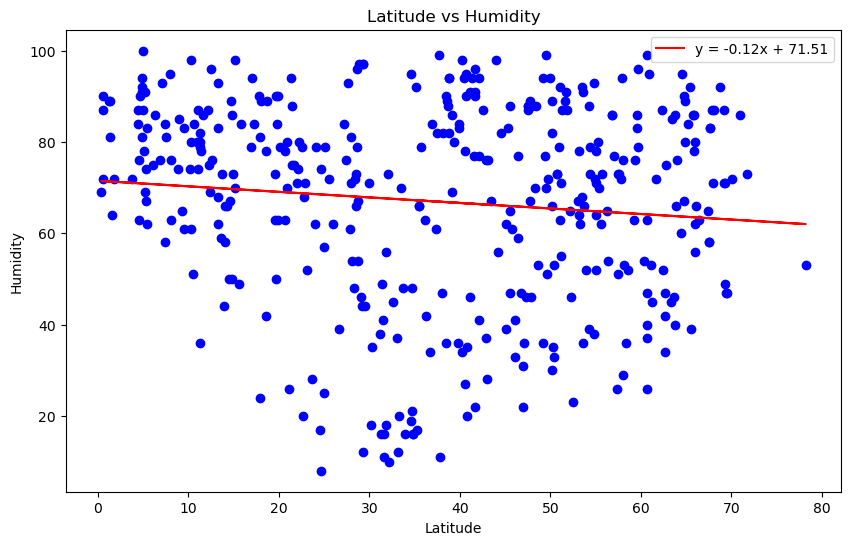

In [43]:
# Northern Hemisphere
# YOUR CODE HERE


def create_linear_regression_plot(x, y, title, xlabel, ylabel):
    # Perform linear regression
    m, b = np.polyfit(x, y, 1)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue')
    plt.plot(x, m*x + b, color='red', label=f'y = {m:.2f}x + {b:.2f}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

x=northern_hemi_df['Lat']
y=northern_hemi_df['Humidity']
title = "Latitude vs Humidity"
ylabel = 'Humidity'
xlabel = 'Latitude'
create_linear_regression_plot(x, y, title, xlabel, ylabel)

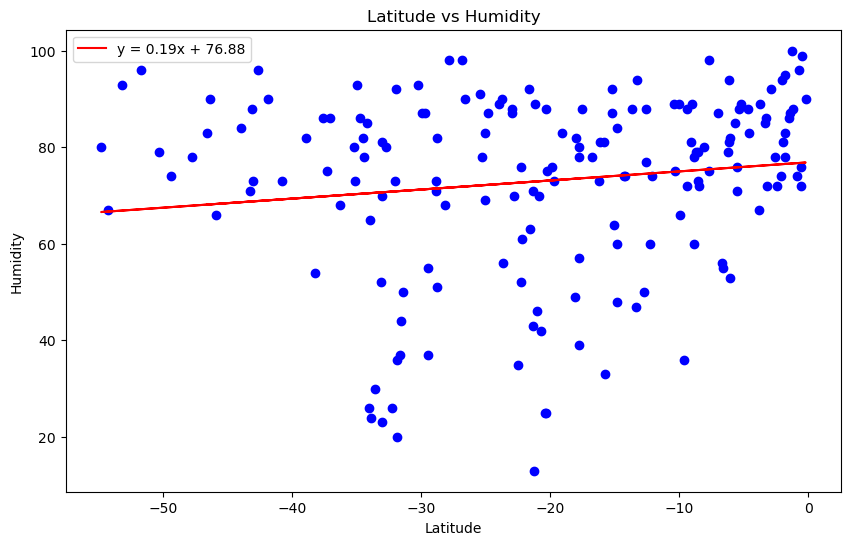

In [47]:
# Southern Hemisphere
# YOUR CODE HERE
def create_linear_regression_plot(x, y, title, xlabel, ylabel):
    # Perform linear regression
    m, b = np.polyfit(x, y, 1)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue')
    plt.plot(x, m*x + b, color='red', label=f'y = {m:.2f}x + {b:.2f}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

x=southern_hemi_df['Lat']
y=southern_hemi_df['Humidity']
title = "Latitude vs Humidity"
ylabel = 'Humidity'
xlabel = 'Latitude'
create_linear_regression_plot(x, y, title, xlabel, ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

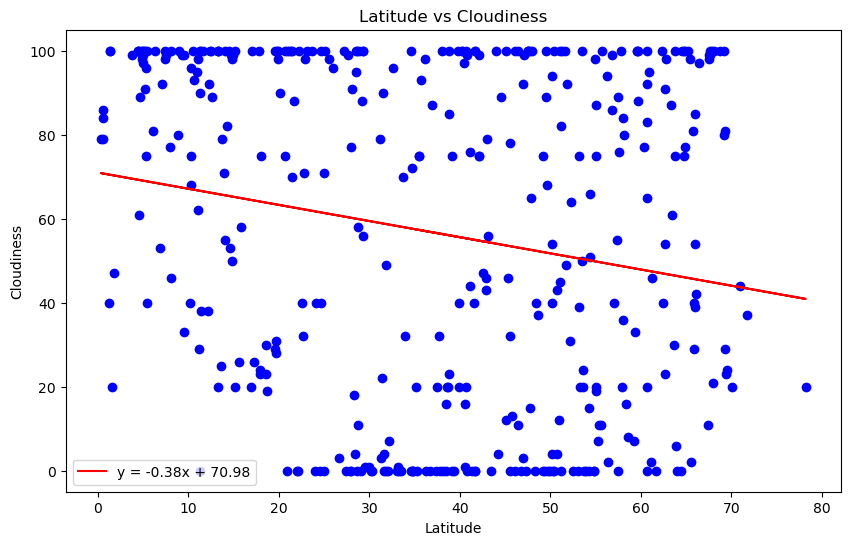

In [49]:
# Northern Hemisphere
# YOUR CODE HERE
def create_linear_regression_plot(x, y, title, xlabel, ylabel):
    # Perform linear regression
    m, b = np.polyfit(x, y, 1)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue')
    plt.plot(x, m*x + b, color='red', label=f'y = {m:.2f}x + {b:.2f}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

x=northern_hemi_df['Lat']
y=northern_hemi_df['Cloudiness']
title = "Latitude vs Cloudiness"
ylabel = 'Cloudiness'
xlabel = 'Latitude'
create_linear_regression_plot(x, y, title, xlabel, ylabel)

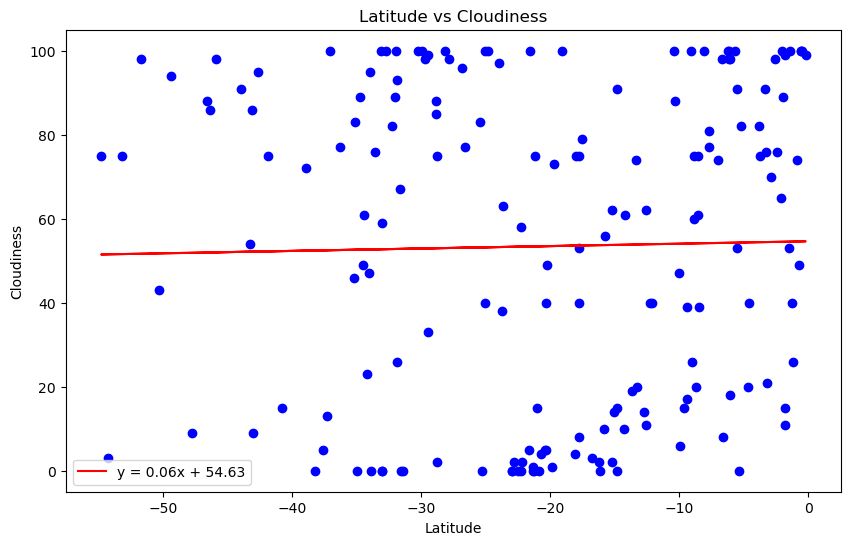

In [50]:
# Southern Hemisphere
# YOUR CODE HERE

def create_linear_regression_plot(x, y, title, xlabel, ylabel):
    # Perform linear regression
    m, b = np.polyfit(x, y, 1)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue')
    plt.plot(x, m*x + b, color='red', label=f'y = {m:.2f}x + {b:.2f}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


x=southern_hemi_df['Lat']
y=southern_hemi_df['Cloudiness']
title = "Latitude vs Cloudiness"
ylabel = 'Cloudiness'
xlabel = 'Latitude'
create_linear_regression_plot(x, y, title, xlabel, ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

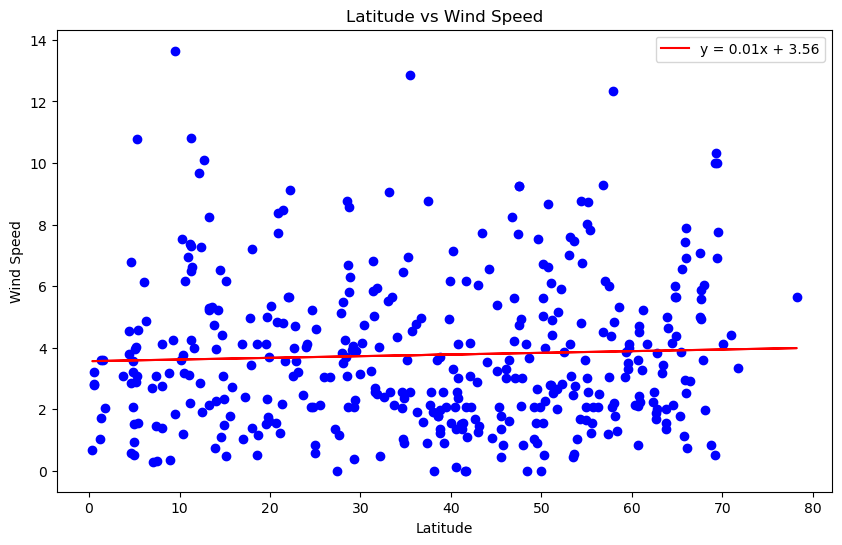

In [51]:
# Northern Hemisphere
# YOUR CODE HERE
def create_linear_regression_plot(x, y, title, xlabel, ylabel):
    # Perform linear regression
    m, b = np.polyfit(x, y, 1)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue')
    plt.plot(x, m*x + b, color='red', label=f'y = {m:.2f}x + {b:.2f}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

x=northern_hemi_df['Lat']
y=northern_hemi_df['Wind Speed']
title = "Latitude vs Wind Speed"
ylabel = 'Wind Speed'
xlabel = 'Latitude'
create_linear_regression_plot(x, y, title, xlabel, ylabel)

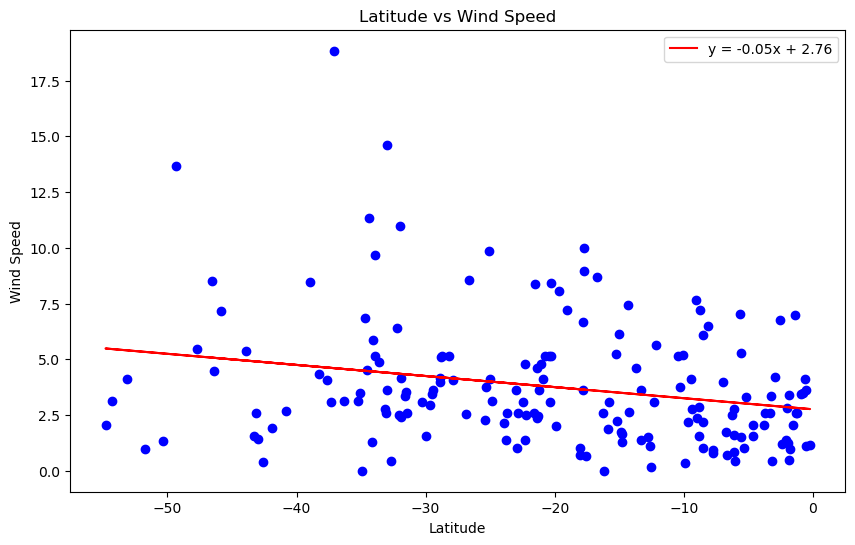

In [53]:
# Southern Hemisphere
# YOUR CODE HERE

def create_linear_regression_plot(x, y, title, xlabel, ylabel):
    # Perform linear regression
    m, b = np.polyfit(x, y, 1)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue')
    plt.plot(x, m*x + b, color='red', label=f'y = {m:.2f}x + {b:.2f}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

x=southern_hemi_df['Lat']
y=southern_hemi_df['Wind Speed']
title = "Latitude vs Wind Speed"
ylabel = 'Wind Speed'
xlabel = 'Latitude'
create_linear_regression_plot(x, y, title, xlabel, ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Summary
A linear relationship means one variable changes proportionally with another. We are investigation the linear relationship between Latitude, in the Northern hemisphere and the Southern hemisphere, and Temperature, Humidity, Cloudiness and lastly Wind Speed. 
A positive linear relationship between Latitude and any of weather type mentioned would mean the higher the Latitude the higher the value in the weather type. A negative linear relationship is the opposite.
Please note that the hemispheres mentioned are distinguished by the latitude below 0 and the former more than 0, for clarity Northern hemisphere is above zero.
Looking at the linear regression plot, we observe that both hemispheres have opposite linear relationship between Latitude (as seen horizontally) and the following Temperature, Humidity, Cloudiness and lastly Wind Speed (as seen horizontally).
For example: the higher the latitude in Northern Hemisphere, the lower the max temperature and this the opposite in Southern hemisphere whereby the higher the latitude the higher the temperature.
The steepness of a linear equation, indicated by the slope, shows how quickly one variable changes in response to another. A steeper slope means a greater change rate.
